# Problem statement

## HR Analytics Project
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

## Objective
Predicting Employee Attrition Using Machine Learning

In [7]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [8]:
#Loading Dataset

df = pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\Week 1\Hr Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# checking shape of our  model
df.shape

(1470, 35)

In [10]:
# checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# seems there is no null values
# lets confirm it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# Checking for imbalance data
df.value_counts('Attrition')

Attrition
No     1233
Yes     237
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

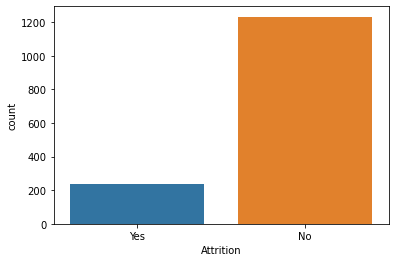

In [13]:
# ploting it in a graph
sns.countplot(x="Attrition",data=df)

In [14]:
#Statistical Description of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<AxesSubplot:>

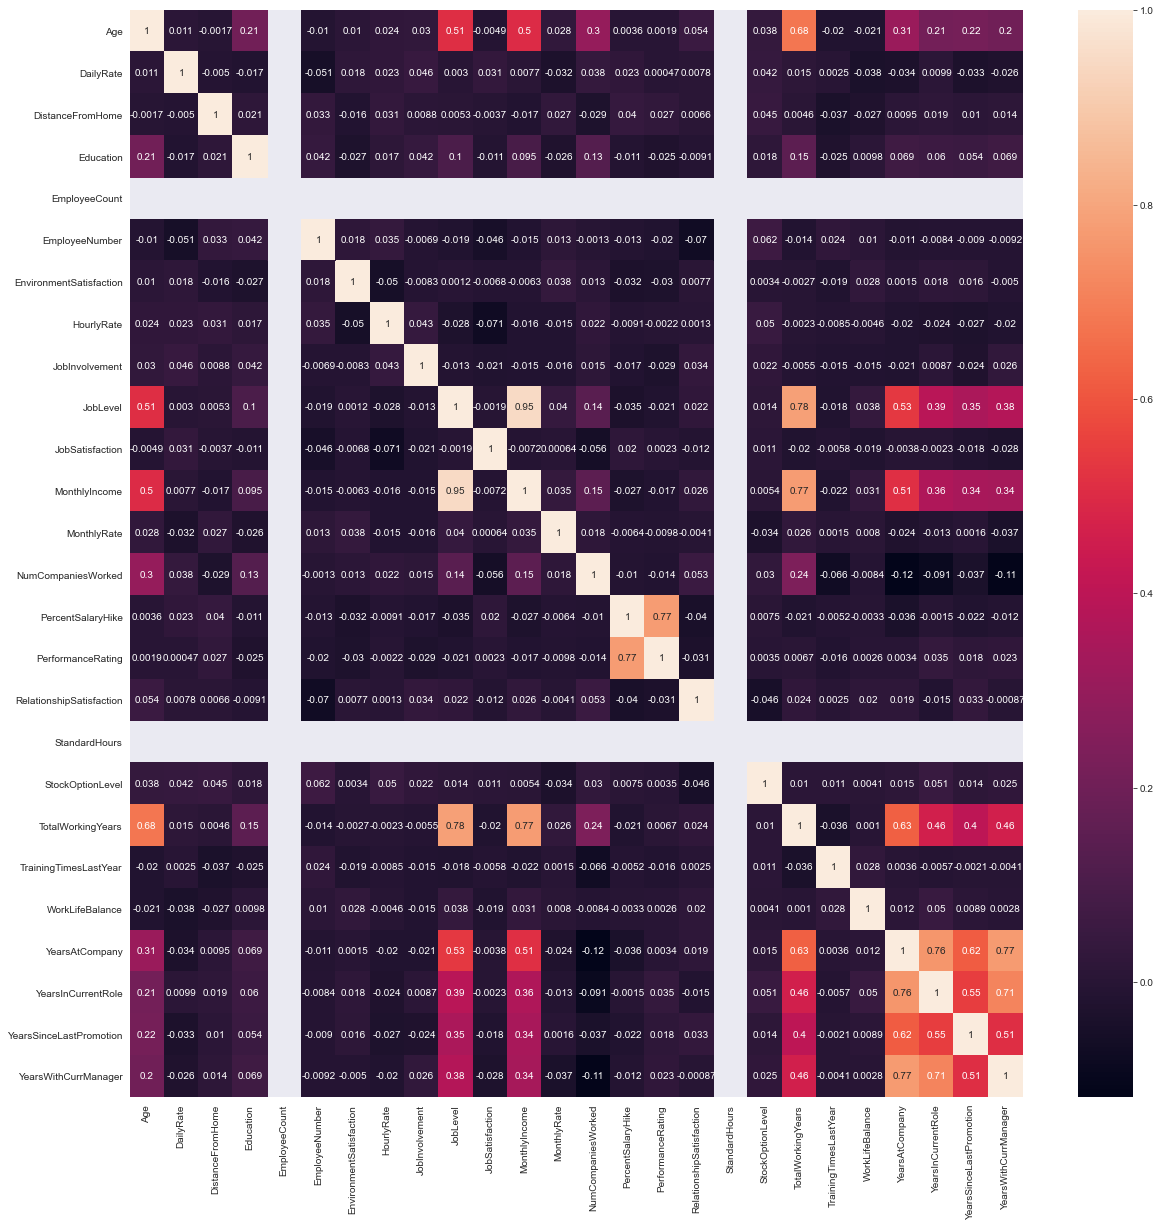

In [15]:
#Defining correlation using HeatMap
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [16]:
#Function For Plotting Distribution of Numerical Variable and its affect on attirition

def NV_TP(df,segment,target="Attrition"):
    
    fig,ax=plt.subplots(ncols=2,figsize=(14,7))
    sns.boxplot(x = target, y = segment, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment + " vs " + target)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment], ax=ax[1], kde=False)
    
    plt.show()

## Analyzing the Variables:
Numerical

### Age

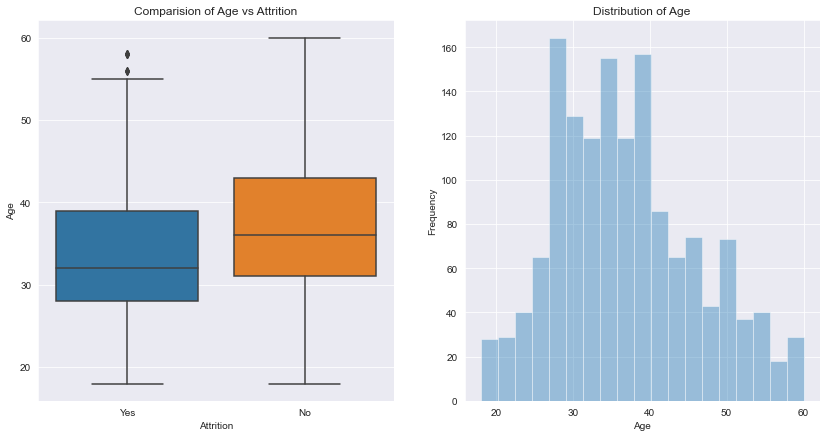

In [17]:
#Checking Distribution of Age and it's related to attirition or not
NV_TP(df,segment="Age")

### Daily Rate

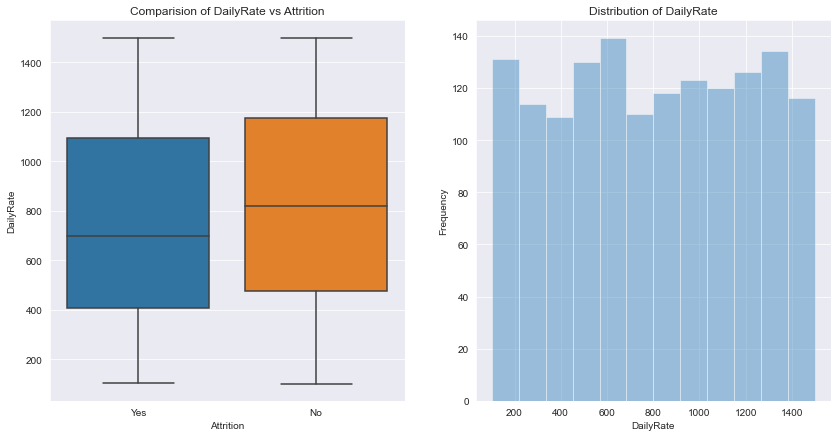

In [19]:
NV_TP(df,segment="DailyRate")

### Monthly Rate

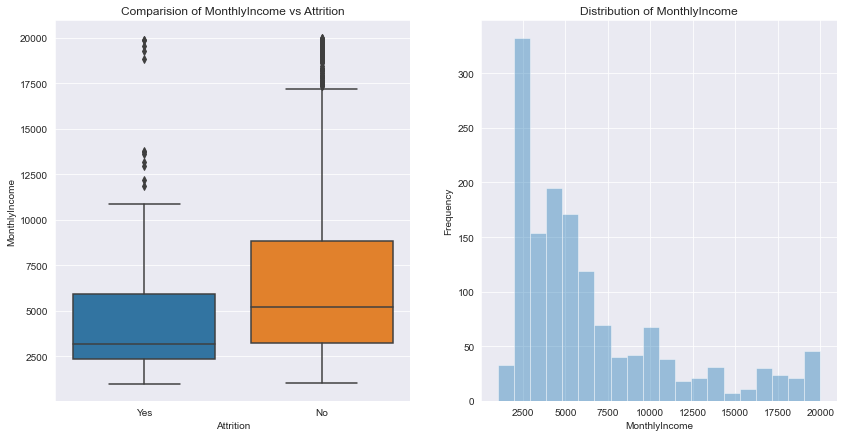

In [20]:
NV_TP(df,segment="MonthlyIncome")

### Hourly Rate

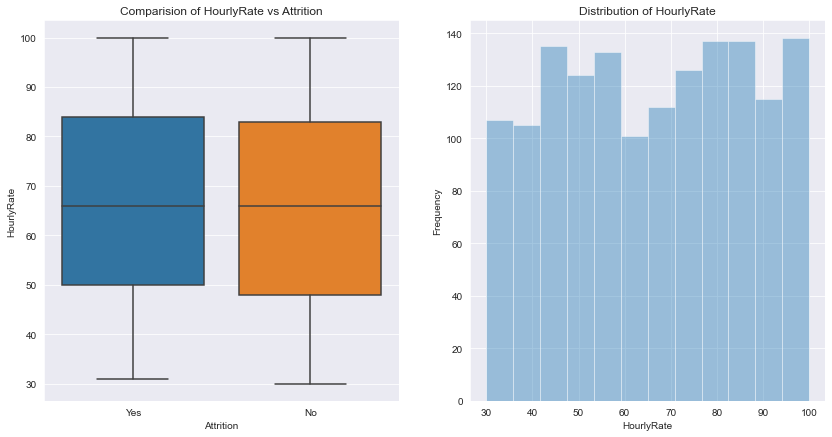

In [22]:
NV_TP(df,segment="HourlyRate")

There is no significant in hourly rate and attirition.Thus, it is not considered as significant to attirition

### Percent Salary Hike

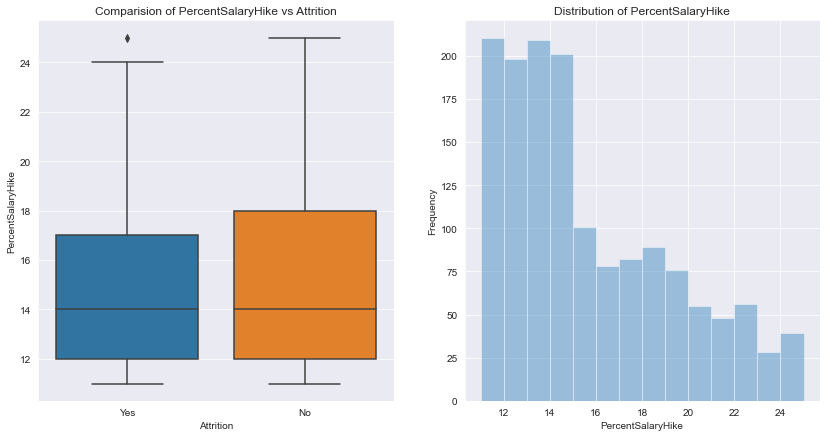

In [23]:
NV_TP(df,segment="PercentSalaryHike")

### Total Working years

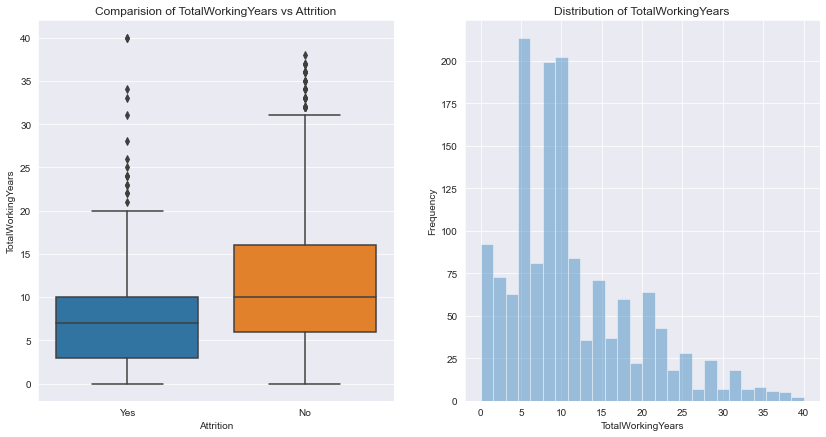

In [24]:
NV_TP(df,segment="TotalWorkingYears")

### Distance From Home

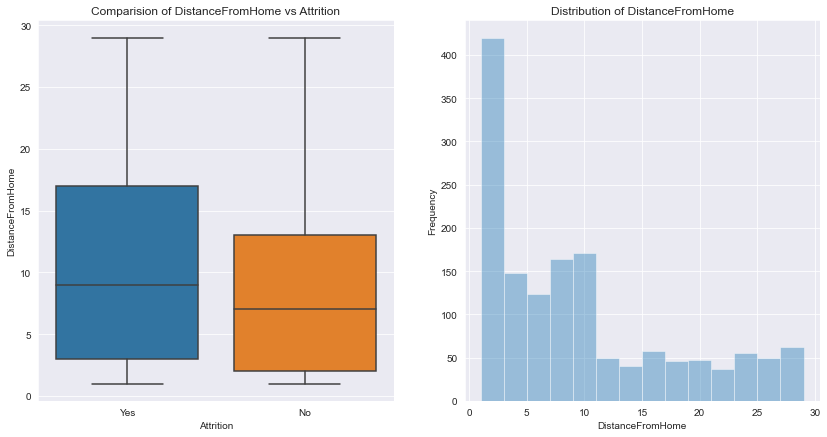

In [25]:
NV_TP(df,segment="DistanceFromHome")

### Years With Curr Manager


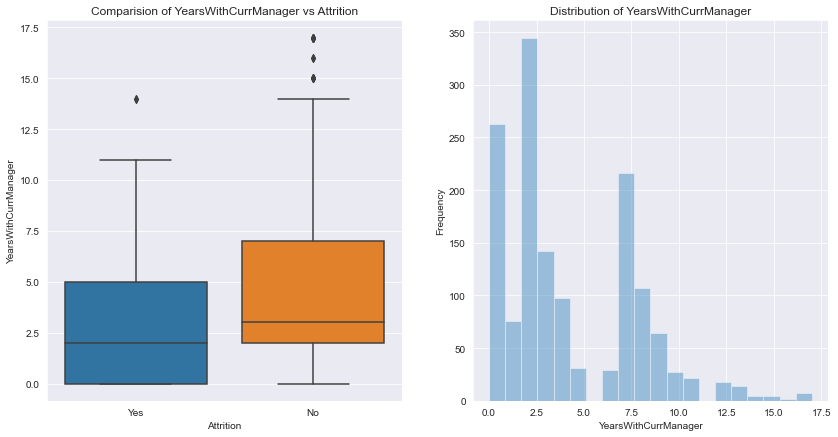

In [26]:
NV_TP(df,segment="YearsWithCurrManager")

### Years Since Last Promotion

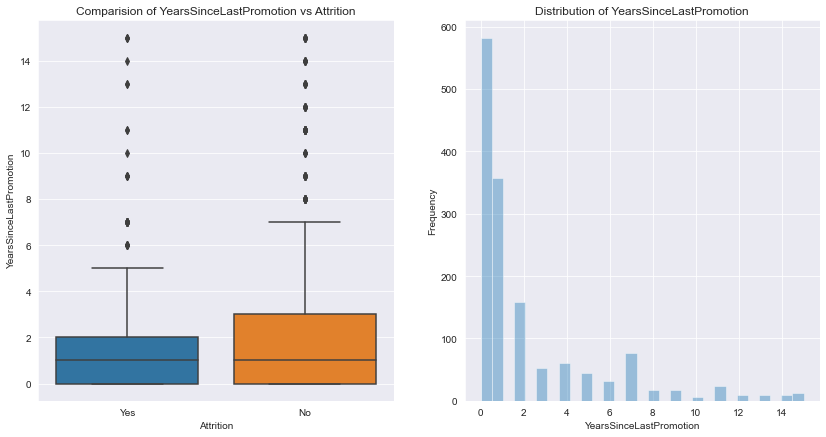

In [27]:
NV_TP(df,segment="YearsSinceLastPromotion")

## Analysing Categorical Variables

#### BusinessTravel

In [28]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

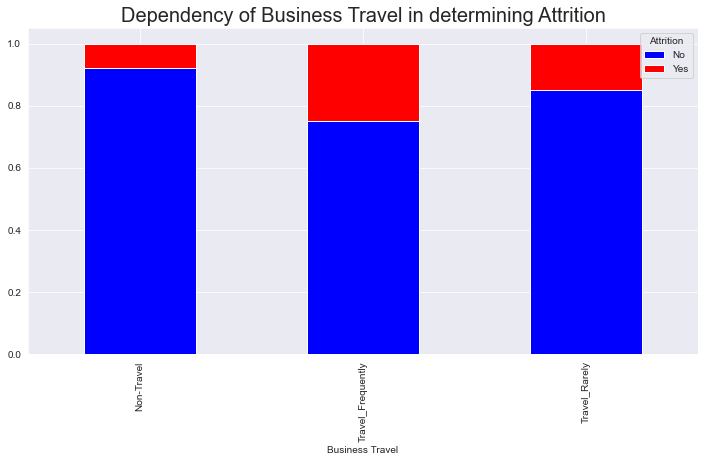

In [32]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['blue', 'red'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=20)
plt.xlabel('Business Travel')
plt.show()

Jobs where Travel frequency is high is having high attrition rate

### Job Involvement

In [34]:
df.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [35]:
#Cross Tabulation between Job invovement and Attrition
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [36]:
#Calculating Percentage of People Having Different Job Involvement Rate
round(df.JobInvolvement.value_counts()/df.shape[0]*100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

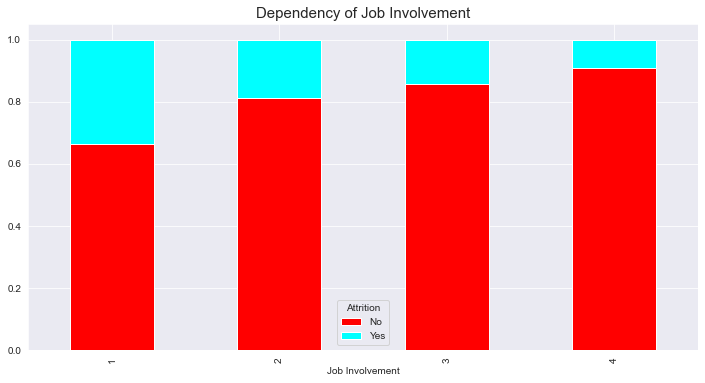

In [37]:
data=pd.crosstab(df['JobInvolvement'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['red', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Job Involvement', fontsize=15)
plt.xlabel('Job Involvement')
plt.show()

### JobRole

In [39]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

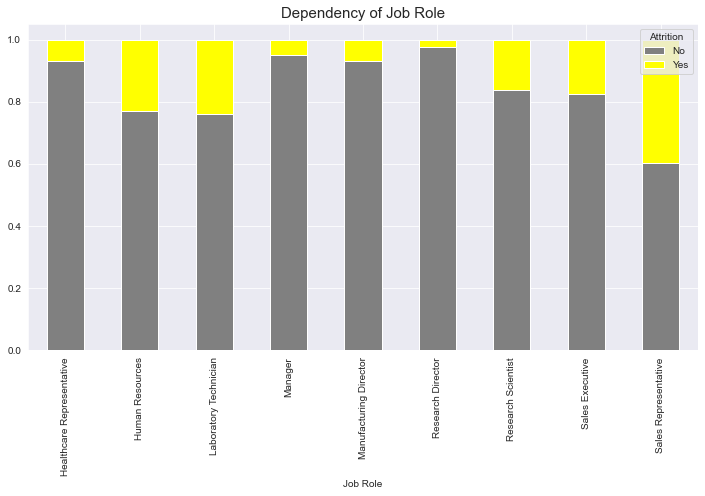

In [41]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['grey', 'yellow'], 
                                                figsize=(12,6))
plt.title('Dependency of Job Role', fontsize=15)
plt.xlabel('Job Role')
plt.show()


### Attrition Rate is High for :
Sales Representative

Sales Executive

Human Resources

Laboratory Technician

### Department

In [42]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

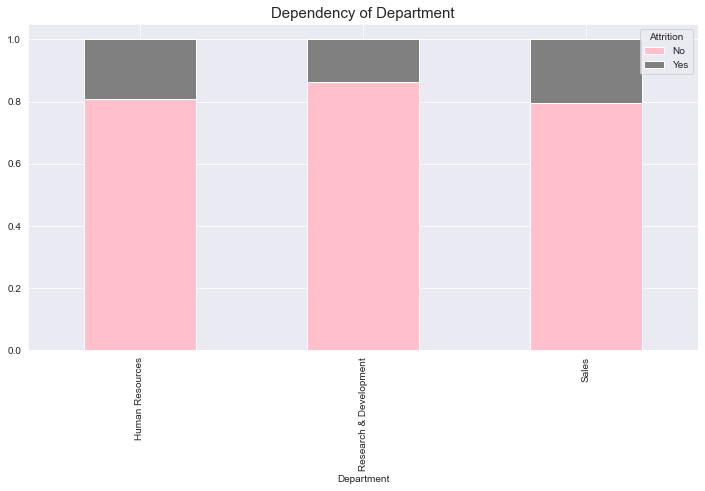

In [44]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['pink', 'grey'], 
                                                figsize=(12,6))
plt.title('Dependency of Department', fontsize=15)
plt.xlabel('Department')
plt.show()

### OverTime

In [46]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

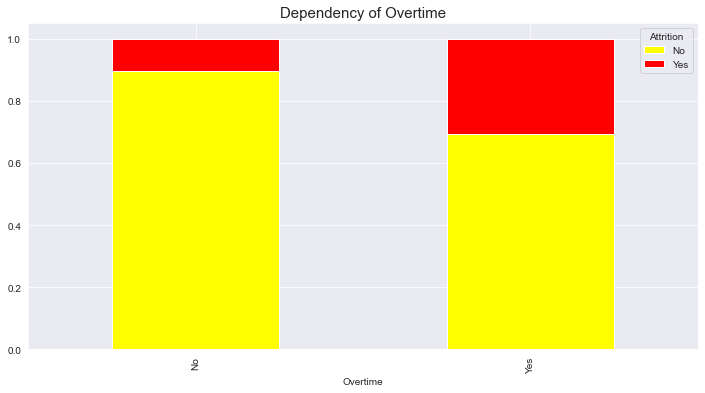

In [47]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['yellow', 'red'], 
                                                figsize=(12,6))
plt.title('Dependency of Overtime', fontsize=15)
plt.xlabel('Overtime')
plt.show()


### Relationship Satisfaction

In [48]:
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

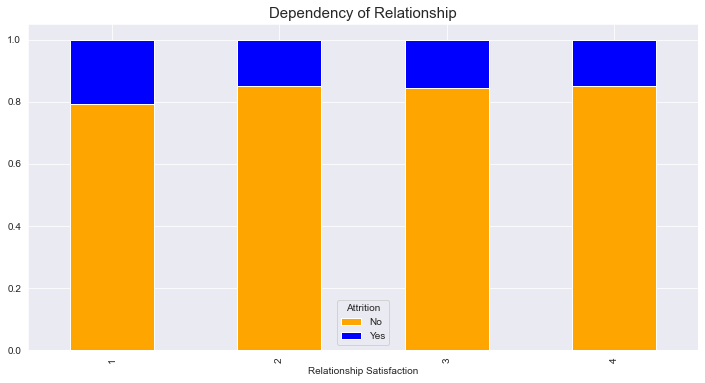

In [49]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'blue'], 
                                                figsize=(12,6))
plt.title('Dependency of Relationship', fontsize=15)
plt.xlabel('Relationship Satisfaction')
plt.show()

### Education Field

In [50]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

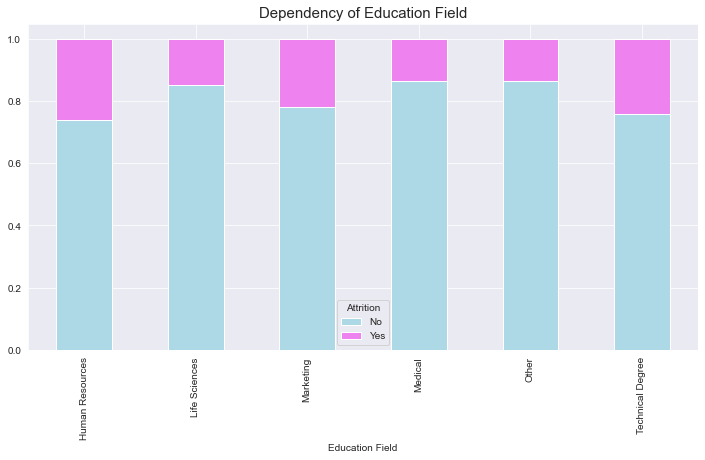

In [51]:
data=pd.crosstab(df['EducationField'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'violet'], 
                                                figsize=(12,6))
plt.title('Dependency of Education Field', fontsize=15)
plt.xlabel('Education Field')
plt.show()

### Work Life Balance

In [53]:
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

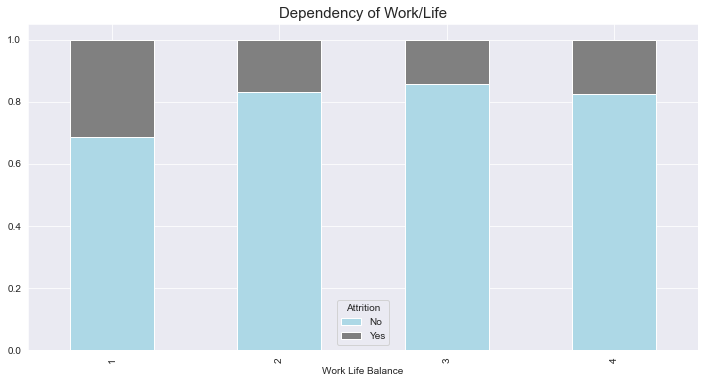

In [57]:
data=pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'grey'], 
                                                figsize=(12,6))
plt.title('Dependency of Work/Life', fontsize=15)
plt.xlabel('Work Life Balance')
plt.show()

Poor Work Life Balance trigger Employee to quit Job

### Marital Status

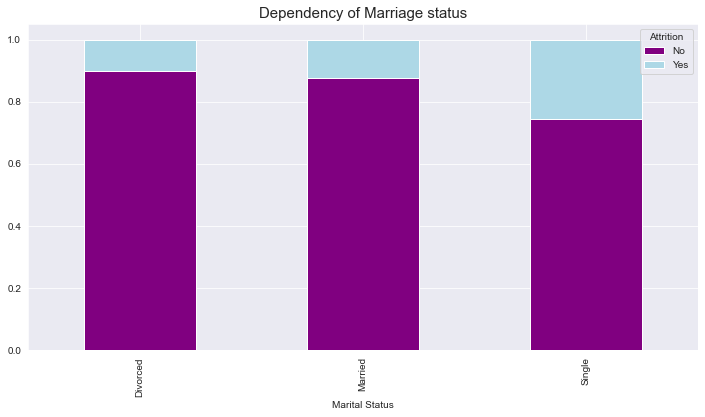

In [58]:
data=pd.crosstab(df['MaritalStatus'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['purple', 'lightblue'], 
                                                figsize=(12,6))
plt.title('Dependency of Marriage status', fontsize=15)
plt.xlabel('Marital Status')
plt.show()

### Comparison of Gender with other Factors


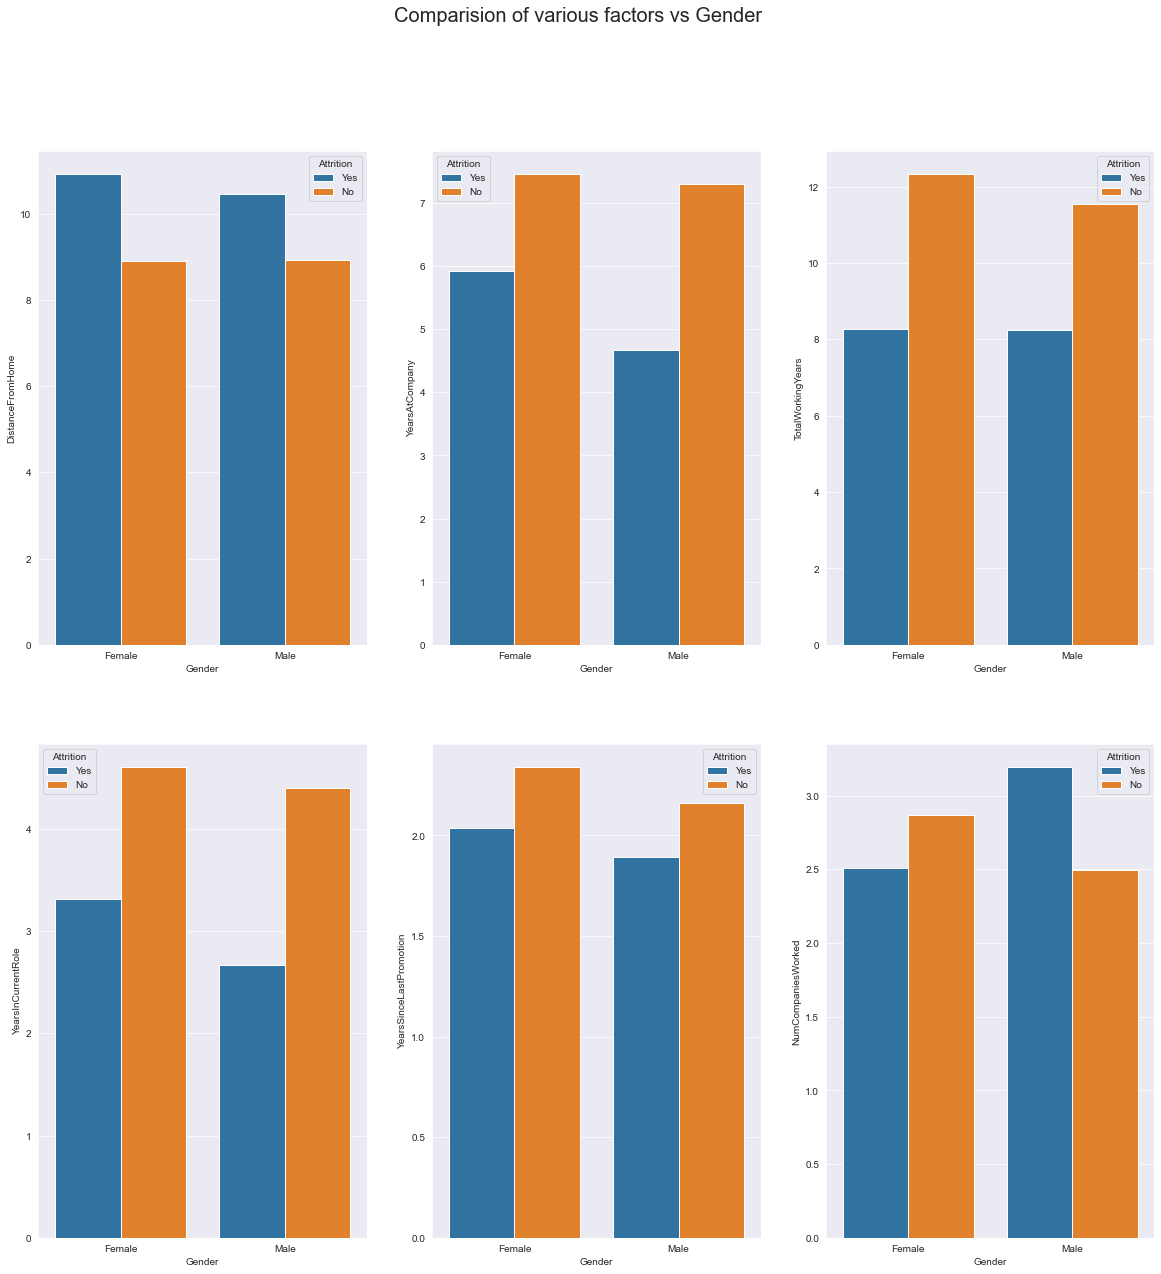

In [59]:
fig,ax = plt.subplots(2,3, figsize=(20,20))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(df['Gender'],df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(df['Gender'],df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

In [60]:
#From EDA dropping Variables that are not necessary
df1=df.drop(columns=["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours"],axis=1)

In [61]:
#Seperating Numerical and Categorical Variables

dict(df1.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [62]:
num_var_nam=[key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['float32','int32','float64','int64']]

In [63]:
cat_var_nam=[key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['object']]
cat_var_nam

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [64]:
#Storing Both in different dataset
df_num=df1[num_var_nam]
df_cat=df1[cat_var_nam]

In [66]:
df_cat.drop(columns=['Attrition'])

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married,No


In [67]:
#Converting into dummy variables
df_cat=pd.get_dummies(df_cat)

In [68]:
#Merging Both Datasets
df_final=pd.concat([df_num,df_cat,df1[["Attrition"]]],axis=1)

In [69]:
df_final=df_final.drop(columns=['Attrition_No','Attrition_Yes'],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,0,0,1,0,0,0,1,0,1,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,0,1,0,0,0,1,0,1,0,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,0,0,0,0,0,0,1,0,1,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,0,1,0,0,0,1,0,0,1,No
4,27,591,2,1,1,3,1,2,3468,16632,...,0,0,0,0,0,1,0,1,0,No


#### More Visualization

In [71]:
#Seperating Variables and Predictors
X=df_final.drop(columns=['Attrition'])
y=df_final["Attrition"]

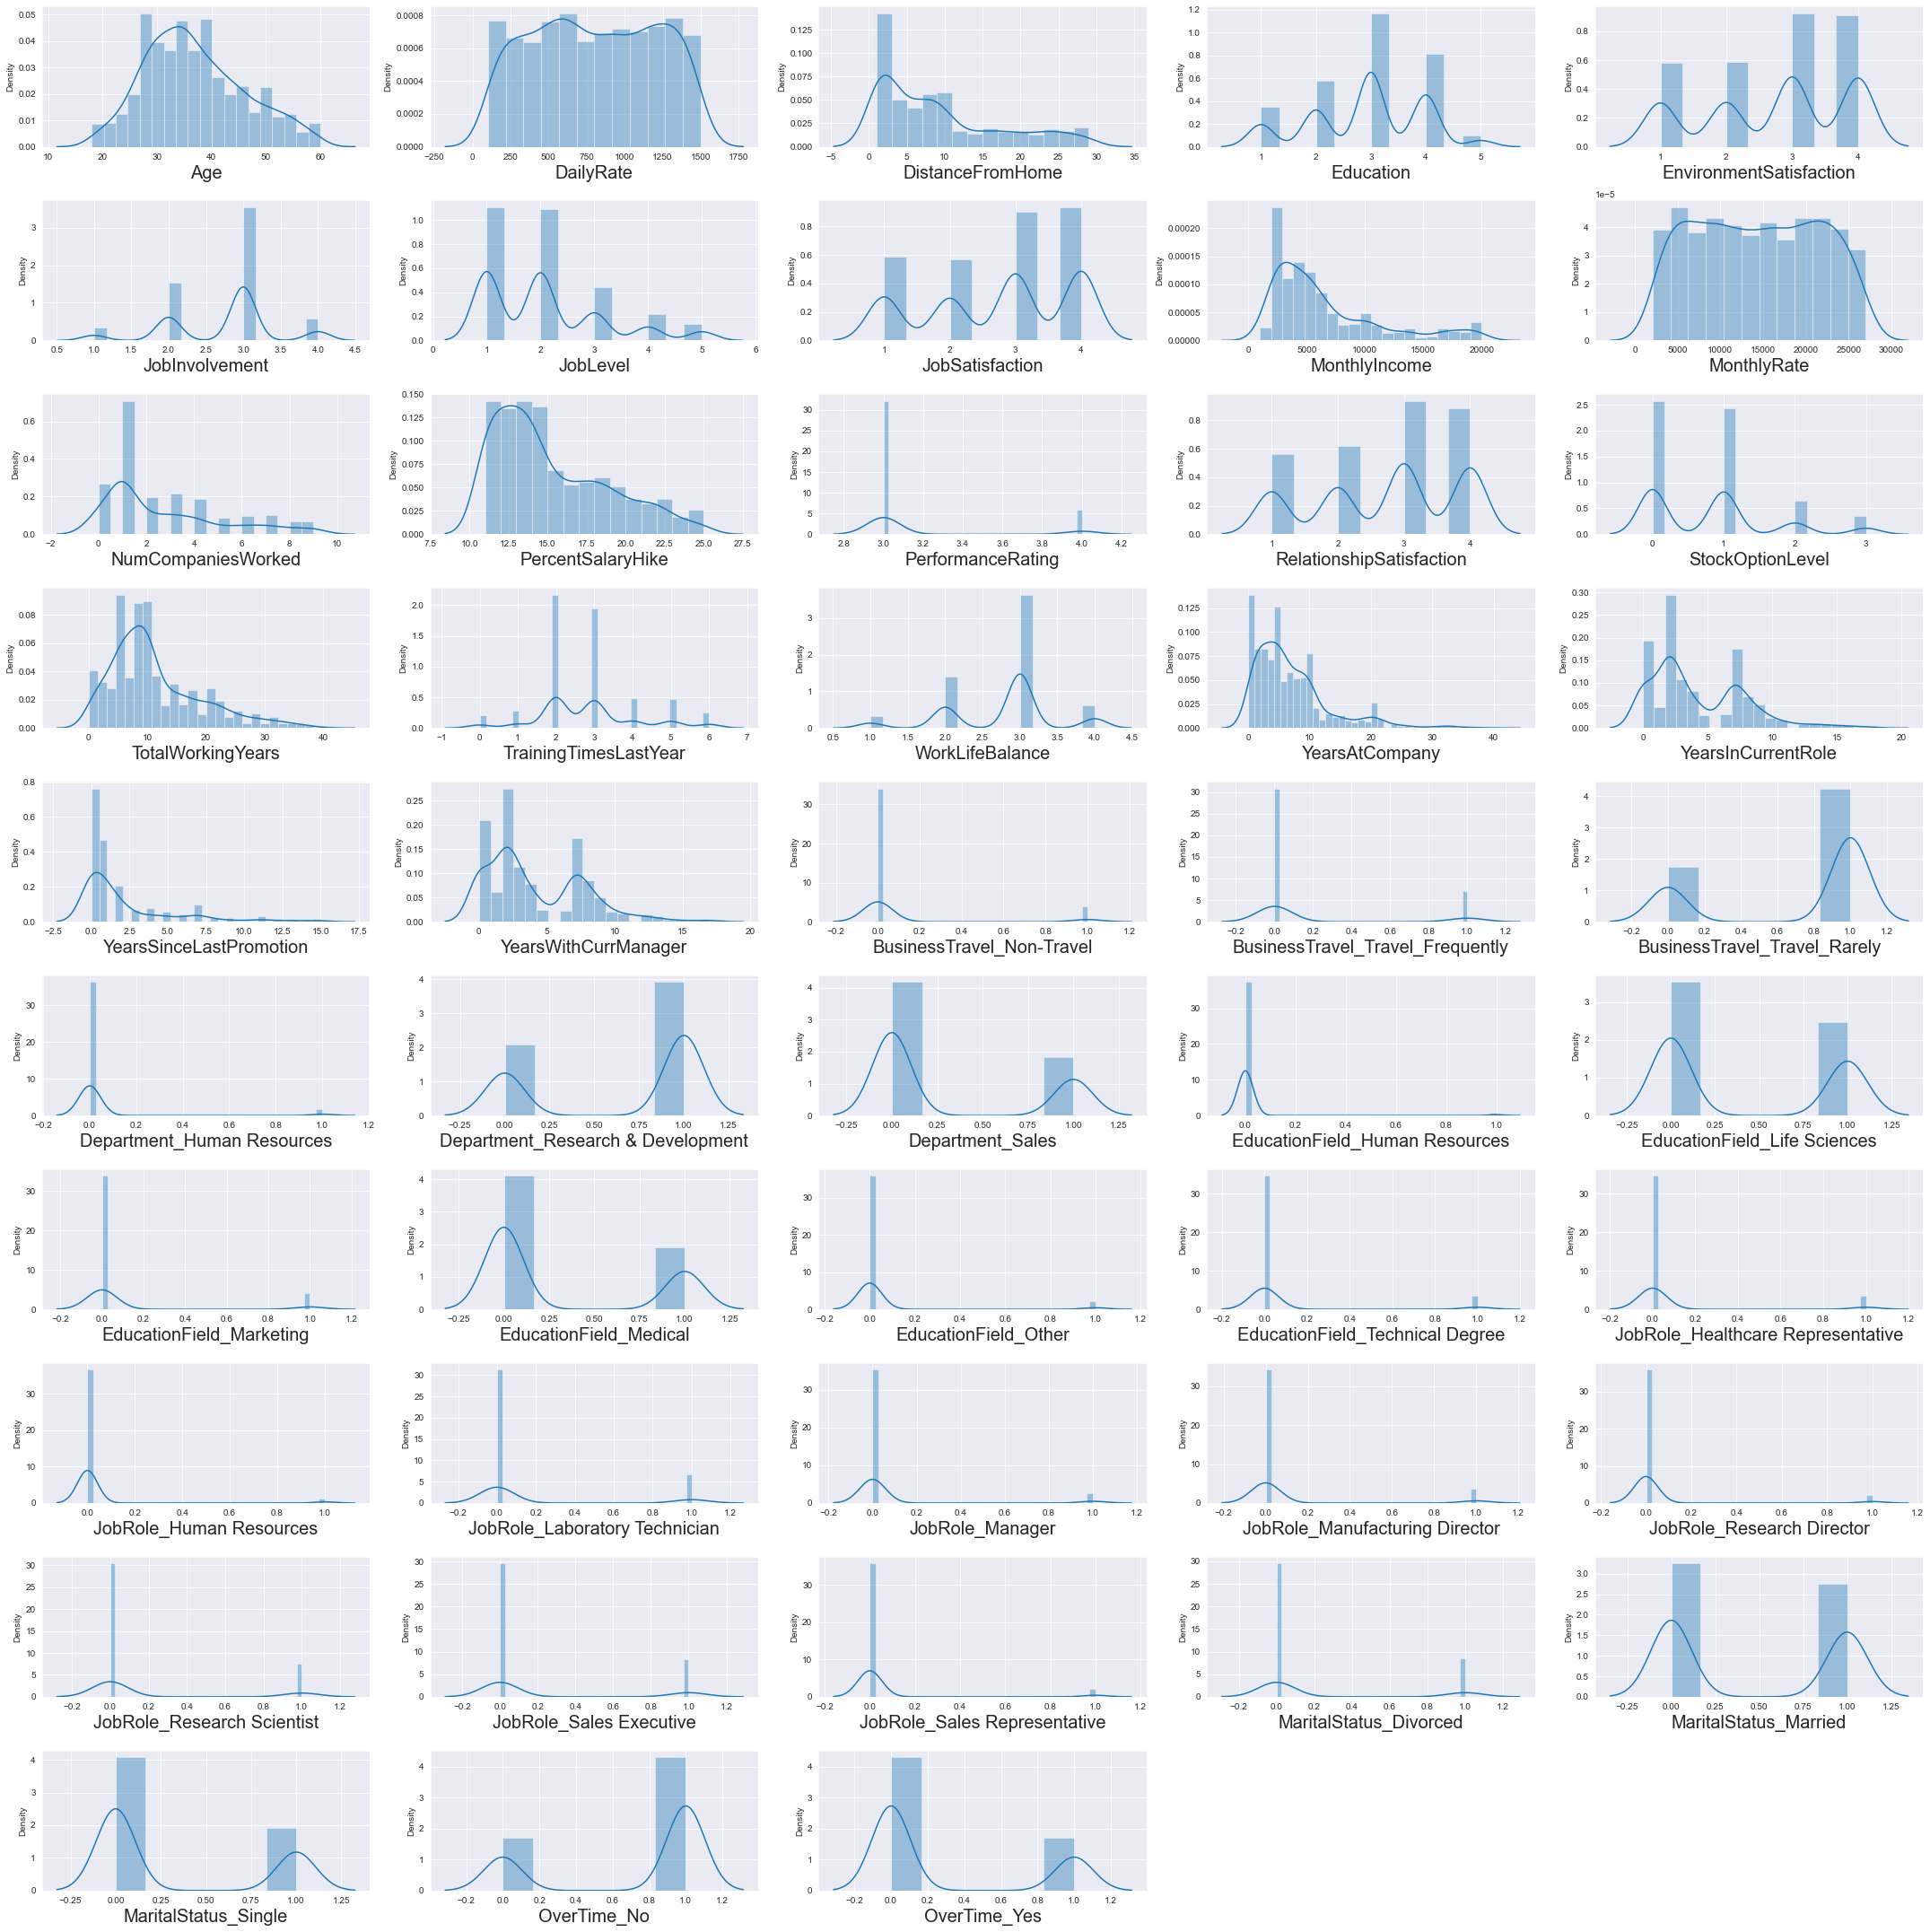

In [72]:
#Checking for Distribution and outliers :

plt.figure(figsize=(30,30))
plotnumber=1

for column in X:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

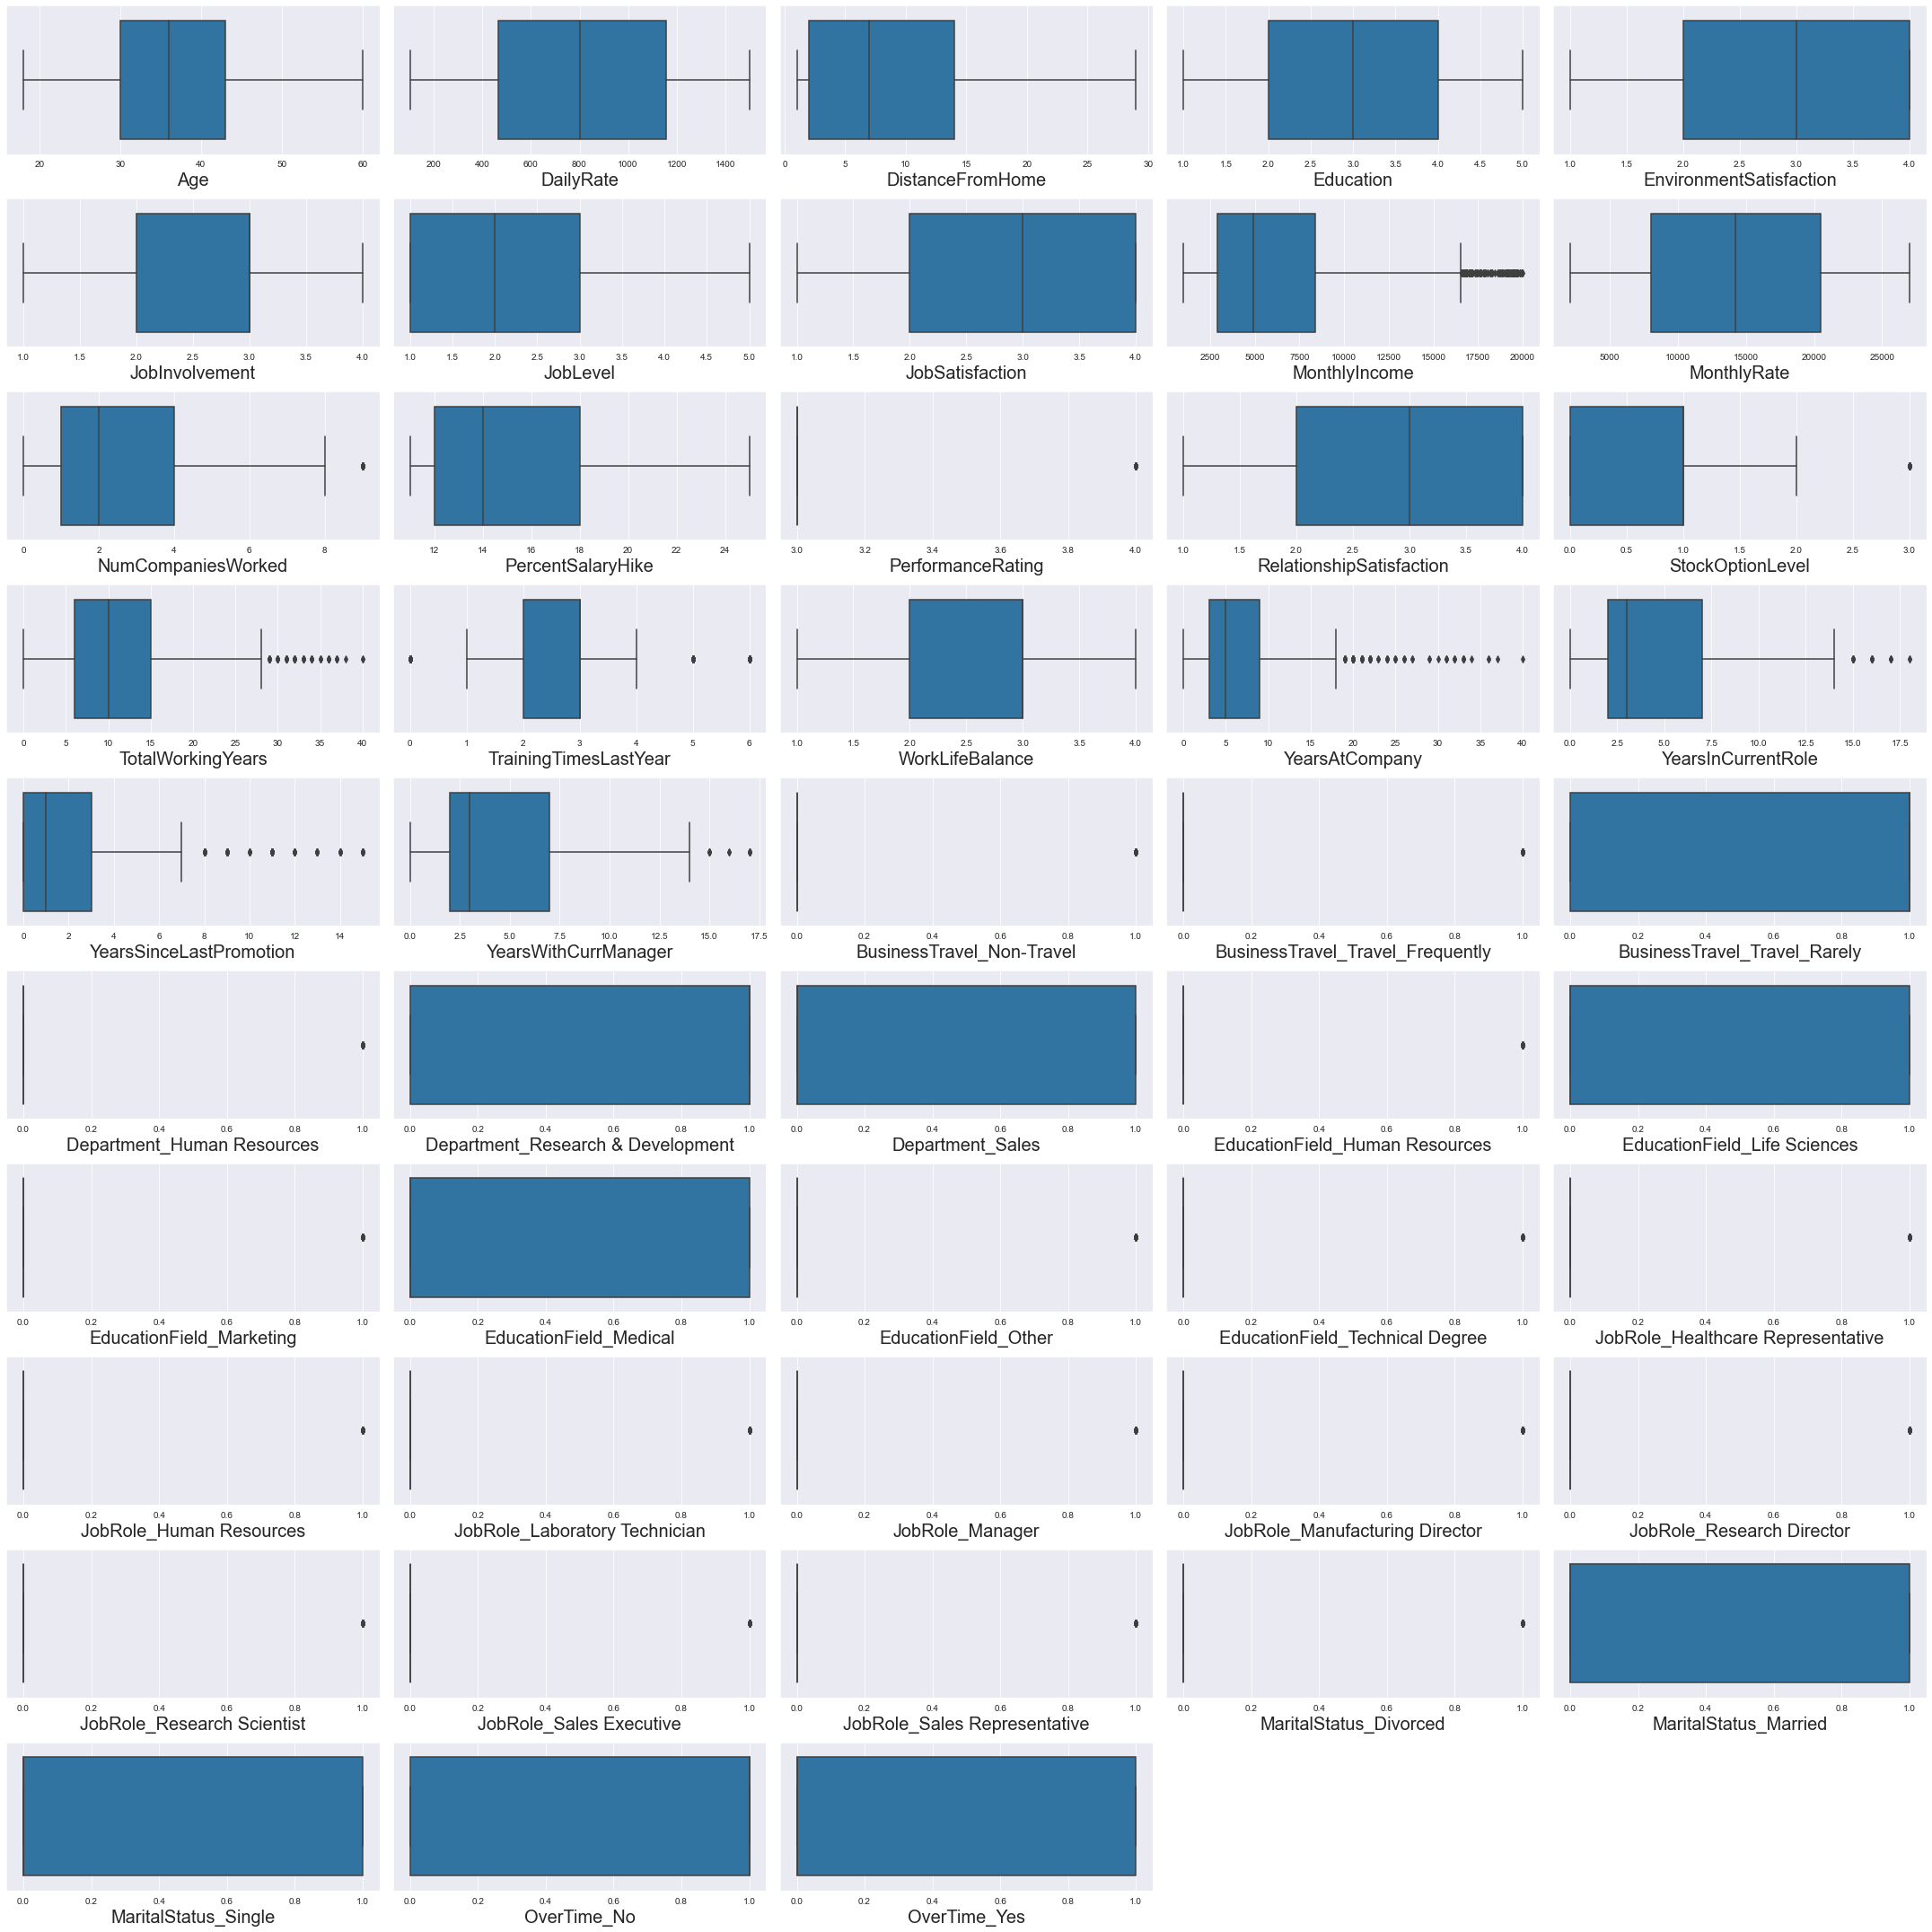

In [73]:
#Outliers using Box plot

plt.figure(figsize=(30,30))
plotnumber=1

for column in X:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [75]:
#Label Encoding 'Attrition' :

label_col = ['Attrition']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_final[label_col]=df_final[label_col].apply(lambda x : label.fit_transform(x))

In [76]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,3,2,2,2,5130,24907,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,2,1,3,2090,2396,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,4,3,1,3,2909,23159,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,1,3,1,2,3468,16632,...,0,0,0,0,0,1,0,1,0,0


In [77]:
# our label has been encoded
df_final.shape

(1470, 49)

In [78]:
# No of rows has been increased as we have created dummy columns  before
#Treating outliers using z - score method


from scipy.stats import zscore

z=np.abs(zscore(df_final[['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                         'YearsWithCurrManager','TotalWorkingYears','YearsSinceLastPromotion']]))
threshold=3
df_new_=df_final[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df_final))
print("rows after applying zscore: ",len(df_new_))


rows before applying zscore:  1470
rows after applying zscore:  1387


In [79]:
#### We , did'nt loose any considerable amount of data.
#Skewness

df_new_.skew()

Age                                  0.472280
DailyRate                           -0.017078
DistanceFromHome                     0.954752
Education                           -0.289024
EnvironmentSatisfaction             -0.325285
JobInvolvement                      -0.501401
JobLevel                             1.126075
JobSatisfaction                     -0.345612
MonthlyIncome                        1.544770
MonthlyRate                          0.030596
NumCompaniesWorked                   1.037715
PercentSalaryHike                    0.800592
PerformanceRating                    1.931566
RelationshipSatisfaction            -0.295686
StockOptionLevel                     0.962332
TotalWorkingYears                    1.034487
TrainingTimesLastYear                0.577614
WorkLifeBalance                     -0.557100
YearsAtCompany                       1.248623
YearsInCurrentRole                   0.726675
YearsSinceLastPromotion              1.756335
YearsWithCurrManager              

In [80]:
#Treating skewed data for features :

x_ = df_new_.drop(columns=['Attrition'],axis=1) #Seperating feature and label in x and y
y_ = df_new_['Attrition']

for index in x_.skew().index:
    if x_.skew().loc[index]>0.5:
        x_[index]=np.cbrt(x_[index])
        if x_.skew().loc[index]<-0.5:
            x_[index]=np.square(x_[index])

In [81]:
y_.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

##### Since, target set is imbalanced we will do oversampling.

In [82]:
x_1 = df_new_.drop(columns=['Attrition'],axis=1)
y_1 = df_new_['Attrition']

import imblearn
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x_over,y_over = SM.fit_resample(x_1,y_1)

In [83]:
#Checking

y_over.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

In [84]:
#Scaling Feature Data :

#Applying Standard Scalar on feature datasets

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_S = scalar.fit_transform(x_over)

In [85]:
#Importing Models and other libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

In [86]:
#Finding Best Random State :
max_accu = 0
max_rs = 0
for i in range(50,500):
    x_train,x_test,y_train,y_test = train_test_split(X_S,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.9499136442141624 on Random State 59


In [87]:
#Splitting Data into train and test with best random state :

x_train,x_test,y_train,y_test = train_test_split(X_S,y_over,test_size = 0.25, random_state = 59)

### LOGISTIC REGRESSION

In [88]:
results=[] #Creating empty List to store model results:

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
results.append(acc)

TRAINING SCORE :  0.9234312032239493
TESTING SCORE :  0.9499136442141624
ACCURACY : 0.9499136442141624
*****************************
[[289  10]
 [ 19 261]]
*****************************
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       299
           1       0.96      0.93      0.95       280

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579



### Random Forest

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
results.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.9550949913644214
ACCURACY : 0.9550949913644214
*****************************
[[293   6]
 [ 20 260]]
*****************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       299
           1       0.98      0.93      0.95       280

    accuracy                           0.96       579
   macro avg       0.96      0.95      0.95       579
weighted avg       0.96      0.96      0.96       579



### Decision Tree Classifier

In [91]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
results.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.8756476683937824
ACCURACY : 0.8756476683937824
*****************************
[[253  46]
 [ 26 254]]
*****************************
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       299
           1       0.85      0.91      0.88       280

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579



### Gradient Boosting


In [93]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
results.append(acc)

TRAINING SCORE :  0.9694876223373633
TESTING SCORE :  0.9360967184801382
ACCURACY : 0.9360967184801382
*****************************
[[282  17]
 [ 20 260]]
*****************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       299
           1       0.94      0.93      0.93       280

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579



# Knn

In [94]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
results.append(acc)

TRAINING SCORE :  0.9424294761082326
TESTING SCORE :  0.9153713298791019
ACCURACY : 0.9153713298791019
*****************************
[[265  34]
 [ 15 265]]
*****************************
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       299
           1       0.89      0.95      0.92       280

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579



In [95]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN"],"Score":results})
result_df

,ML Models,Score
0,Logistic Regression,0.949914
1,Random Forest,0.955095
2,Decision Tree,0.875648
3,Gradient Boosting,0.936097
4,KNN,0.915371


### ROC_AUC SCORE OF ALL MODELS

In [96]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.9493490205446727
ROC_AUC_SCORE_RANDOM_FOREST : 0.9542522694696608
ROC_AUC_SCORE_DECISION_TREE : 0.8766483516483515
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.9358576206402294
ROC_AUC_SCORE_KNN : 0.9163580984233157


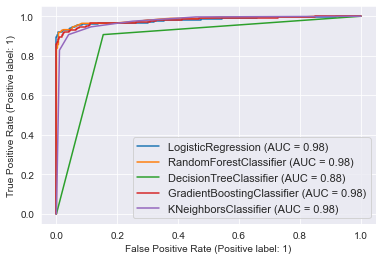

In [98]:
# Plotting Roc-Auc curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [99]:
#Using 5 Fold cross Validation :

cvlr=cross_val_score(lr,X_S,y_over,cv=5,scoring='accuracy')
cvrfc=cross_val_score(rfc,X_S,y_over,cv=5,scoring='accuracy')
cvdt=cross_val_score(dt,X_S,y_over,cv=5,scoring='accuracy')
cvgb=cross_val_score(gb,X_S,y_over,cv=5,scoring='accuracy')
cvkn=cross_val_score(kn,X_S,y_over,cv=5,scoring='accuracy')

print("CV SCORE LOGISTIC REGRESSION : " , cvlr.mean())
print("CV SCORE RANDOM FOREST : " , cvrfc.mean())
print("CV SCORE DECISION TREE : " , cvdt.mean())
print("CV SCORE GRADIENT BOOSTING : " , cvgb.mean())
print("CV SCORE K neighbours : " , cvkn.mean())

CV SCORE LOGISTIC REGRESSION :  0.8848579355030909
CV SCORE RANDOM FOREST :  0.9245298651969911
CV SCORE DECISION TREE :  0.8329727414910255
CV SCORE GRADIENT BOOSTING :  0.889590005213376
CV SCORE K neighbours :  0.9167153869069786


## HYPERPARAMETER TUNING OF RANDOM FOREST CLASSIFIER

In [100]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [101]:
from sklearn.model_selection import GridSearchCV #Using grid search CV for tuning

params = {'bootstrap':[True],
          'criterion': ['gini','entropy'],
         'max_depth':(5,10,15),
         'n_estimators': (100,200,300,400),
          'n_jobs':[-1]
         }
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 10, 15),
                         'n_estimators': (100, 200, 300, 400), 'n_jobs': [-1]})

In [102]:
#Checking Best Parameters

grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 400,
 'n_jobs': -1}

##### Applying parameters for best fit model:

In [103]:
rfc_tuned = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=25,n_estimators=300,
                                  n_jobs=-1)
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, n_jobs=-1)

In [104]:
y_pred_rfc = rfc_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred_rfc)

print('TRAINING SCORE : ', rfc_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rfc_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_rfc))
print('*****************************')
print(classification_report(y_test,y_pred_rfc))

TRAINING SCORE :  1.0
TESTING SCORE :  0.9550949913644214
ACCURACY : 0.9550949913644214
*****************************
[[293   6]
 [ 20 260]]
*****************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       299
           1       0.98      0.93      0.95       280

    accuracy                           0.96       579
   macro avg       0.96      0.95      0.95       579
weighted avg       0.96      0.96      0.96       579



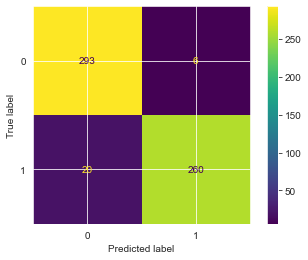

In [105]:
#Plotting Confusion Matrix
plot_confusion_matrix(rfc_tuned,x_test,y_test)

In [106]:
print('ROC_AUC_SCORE_RANDOM_FOREST_TUNED :',roc_auc_score(y_test,rfc_tuned.predict(x_test)))

ROC_AUC_SCORE_RANDOM_FOREST_TUNED : 0.9542522694696608


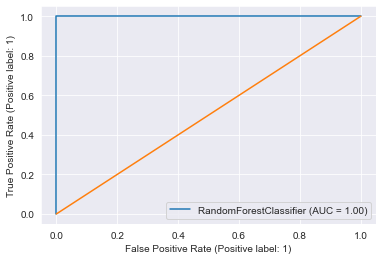

ROC_AUC_SCORE_RANDOM_FOREST_TUNED : 0.9542522694696608


In [107]:
plot_roc_curve(rfc_tuned,x_train,y_train)
plt.plot(y_test,y_test)
plt.show()
print('ROC_AUC_SCORE_RANDOM_FOREST_TUNED :',roc_auc_score(y_test,rfc_tuned.predict(x_test)))

In [108]:
### MODEL SAVING :

In [109]:
import joblib
joblib.dump(rfc_tuned,'hr.pkl') #Dumping best model.

['hr.pkl']

## Efficiency Achieved and Conclusion :